512

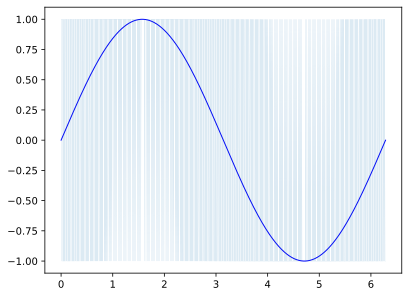

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import math
from common import *

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

pi2 = 2 * np.pi
# spwm采样点数
spwm_sample_point = 256
# 输出正弦交流电频率
output_frequency = 400
# 每样本点对应周期数
clock_per_sample = math.floor(168e6 / output_frequency / spwm_sample_point)
all_spwm_point = np.zeros(spwm_sample_point * clock_per_sample, dtype=np.int8)
partial_list = np.zeros(spwm_sample_point, dtype=np.int16)
for i in range(spwm_sample_point):
    start = i / spwm_sample_point * pi2
    end = start + 1 / spwm_sample_point * pi2
    res = integrate.quad(np.sin, start, end)[0]
    partial: int = round((res * spwm_sample_point / pi2 + 1) / 2 * clock_per_sample)
    partial_list[i] = partial
    begin = i * clock_per_sample
    all_spwm_point[begin : begin + partial] = 1
    all_spwm_point[begin + partial : begin + clock_per_sample] = -1

x = np.linspace(0, pi2, spwm_sample_point * clock_per_sample)
all_sin_point = np.sin(x)
plt.figure(dpi=200)
plt.plot(x, all_sin_point, color="b", linewidth=1)
plt.plot(x, all_spwm_point, linewidth=0.075)

(SoC_dir / "assets" / "spwm.data").write_bytes(partial_list)
